# ASTR 598 Astrostatistics
## HW4 - Classification of QSO and Stars
## Chris Suberlak, Hayden Smotherman, Winnie Wang

The objects in the matched data set is chosen based on Naive Bayes, KNN, and Decision Trees. Here we present the classification of stars and quasars using these threee methods, which are compared to the example presented in the text. In the following analysis, we had cut quasars at z=2. Otherwise our quasar sample would go into the stellar locus.

In [19]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt 
from astropy.table import hstack

In [56]:
# Reading data:
# Load the cross-matched HLC-NSC catalog
hlc_nsc = Table(np.load('hlc_nsc_half_arcsec.npy'))

# Load the QSO training sample
qso = Table(np.load('hlc_nsc_sdss_qso_matches.npy'))

# Load the standard stars training sample 
stars = Table(np.load('hlc_nsc_sdss_stars_matches.npy'))

Deredden the HLC magnitudes -  we need to brighten the apparent magnitude by the amount of reddening to correct for the extinction  - see eg. http://www.astro.ncu.edu.tw/~wchen/Courses/ISM/ ). To use NSC colors, they would have to be dereddened using the reddening called 'NSCebv'.

In [57]:
#de-reddening apparent magnitudes based on 
def make_dereddened_colors(table):
    # Make column with HLC dereddened magnitudes 
    filters = 'ugriz'
    for f in filters : 
        table['HLC'+f+'mag_dered'] = table['HLC'+f+'mag'] - table['HLC'+f+'RED']

    # Make column with HLC colors based on dereddened magnitudes
    for i in range(len(filters)-1):
        f1,f2 = filters[i], filters[i+1]
        table['HLC'+f1+'-'+f2] = table['HLC'+f1+'mag_dered']-table['HLC'+f2+'mag_dered']
        
make_dereddened_colors(hlc_nsc)
make_dereddened_colors(stars)
make_dereddened_colors(qso)

(array([  106.,   412.,   668.,   891.,  1425.,  2818.,  6627.,  8280.,
          795.,     0.]),
 array([ 0.5 ,  0.56,  0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,
         1.04,  1.1 ]),
 <a list of 10 Patch objects>)

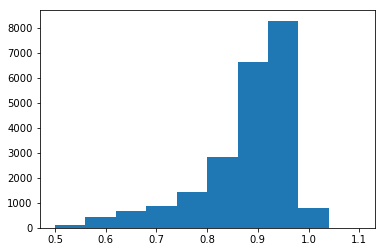

In [31]:
# Just to confirm - since these 
# are quasars, their class_star should be pretty high...
plt.hist(qso['NSCclass_star'], range=(0.5,1.1))

Now, we plot the HLC-NSC all points on u-g,  g-r  diagram,  and overplot the QSO and SDSS using HLC colors. 

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


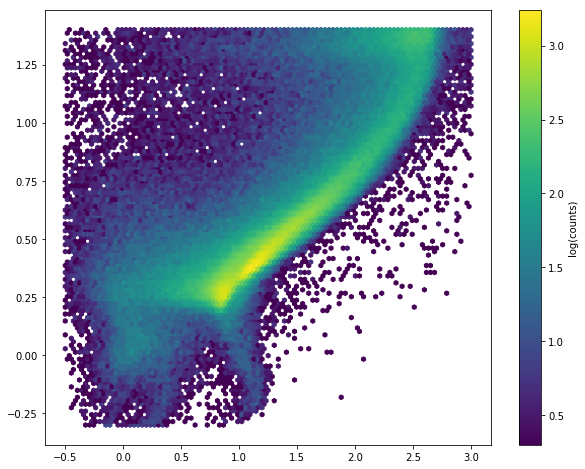

In [61]:
%matplotlib inline

# Select HLC-NSC data : 
# -->  point sources 
m_star = hlc_nsc['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = hlc_nsc['HLCgmag'] /hlc_nsc['HLCgerr'] > 5
m = m_sn * m_star

ug_hlc,gr_hlc = hlc_nsc['HLCu-g'][m],hlc_nsc['HLCg-r'][m]

# 2D-histogram of objects in the g-r vs r-i color diagram 
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
im1 = ax1.hexbin(hlc_nsc['HLCu-g'][m],
                 hlc_nsc['HLCg-r'][m] ,bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5,3, -0.3,1.4))
plt.colorbar(im1, label='log(counts)')

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


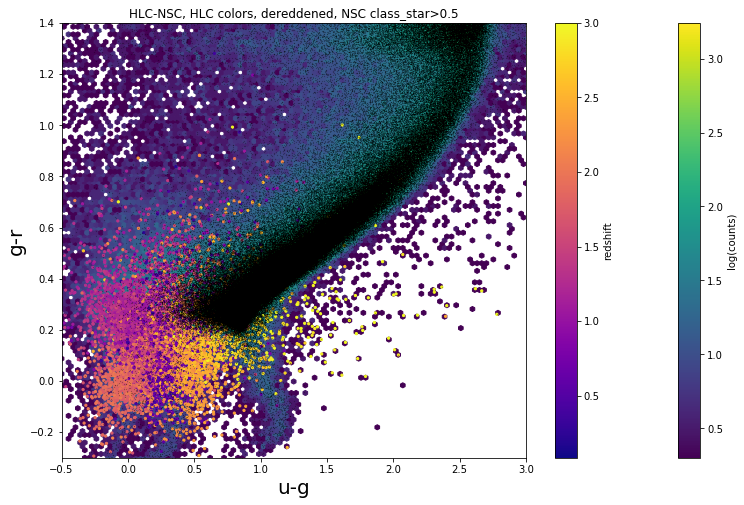

In [62]:
%matplotlib inline

# 2D-histogram of objects in the g-r vs r-i color diagram 
fig, ax1 = plt.subplots(1, 1, figsize=(13, 8))
im1 = ax1.hexbin(ug_hlc,gr_hlc, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5,3, -0.3,1.4))
plt.colorbar(im1, label='log(counts)')

# QSO
# -->  point sources 
m_star = qso['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = qso['HLCgmag'] / qso['HLCgerr'] > 5
m = m_sn * m_star

ug_qso = qso['HLCu-g'][m]
gr_qso = qso['HLCg-r'][m]
redshift_qso=qso['Z'].data[m]
cmap = plt.get_cmap('plasma', len(redshift_qso)) 


# STARS
# -->  point sources 
m_star = stars['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = stars['HLCgmag'] / stars['HLCgerr'] > 5
m = m_sn * m_star

ug_star = stars['HLCu-g'][m]
gr_star = stars['HLCg-r'][m]

# QUASARS
im = ax1.scatter(ug_qso, gr_qso, c=redshift_qso, cmap=cmap, s=5, vmax=3)
plt.colorbar(im, label='redshift')

# STARS 
ax1.scatter(ug_star, gr_star,c='k',s=0.01, label='stars')

ax1.set_xlim(-0.5,3)
ax1.set_ylim(-0.3,1.4)
ax1.set_xlabel('u-g',fontsize=20)
ax1.set_ylabel('g-r',fontsize=20)
ax1.set_title('HLC-NSC, HLC colors, dereddened, NSC class_star>0.5')
plt.savefig('hlc_nsc_qso_stars.png', bbox_inches='tight')

In this plot above, quasars (QSOs) are colored by their redshift (i.e. orange and yellow dots on bottom left), and the black points are SDSS standard stars.  The background are all HLC-NSC sources. Since the plot makes a clear distinction between the quasars and stars, it tells us that indeed it is possible to separate stars and QSO using u-g vs. g-r color information. 

# Classification of data; making a training and test sets:

In the following analysis, we use only SDSS DR14 QSO and SDSS Standard stars with HLC colors. We setup the training set (X), with correct labels (y) . We use a split_samples() function to split samples into training, test, and cross-validation sets, treating 90% as training and 10% as test sets (as was done in the book example). 

In [210]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from astroML.utils import split_samples
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from astroML.classification import GMMBayes

Make a test set and a training set for all classifications : 

In [211]:
def fetch_dr14_quasars(qso):
    # SDSS DR14 QSO cross-matched to HLC-NSC catalog 
    # --> signal / noise > 5 
    m_g_sn = qso['HLCgmag'] / qso['HLCgerr'] > 5
    m_u_sn = qso['HLCumag'] / qso['HLCuerr'] > 5
    m_r_sn = qso['HLCrmag'] / qso['HLCrerr'] > 5
    m_redshift = qso['Z'] < 2.5

    m = m_g_sn * m_u_sn * m_r_sn  * m_redshift
    print('We select ', np.sum(m), ' of ', len(m))
    quasars = qso[m]
    return quasars

def fetch_standard_stars(stars):
    # STARS
    # --> signal / noise > 5 
    m_g_sn = stars['HLCgmag'] / stars['HLCgerr'] > 5
    m_u_sn = stars['HLCumag'] / stars['HLCuerr'] > 5
    m_r_sn = stars['HLCrmag'] / stars['HLCrerr'] > 5

    m =  m_g_sn * m_u_sn* m_r_sn
    print('We select ', np.sum(m), ' of ', len(m))
    stars = stars[m]
    return stars

quasars =  fetch_dr14_quasars(qso)
stars = fetch_standard_stars(stars)

# stack colors into matrix X : it is the training set 
# size : ( number of qso + number of stars ) * ( number of colors )
Nqso = len(quasars)
Nstars = len(stars)
X = np.empty((Nqso + Nstars, 4), dtype=float)

X[:Nqso, 0] = quasars['HLCu-g']
X[:Nqso, 1] = quasars['HLCg-r']
X[:Nqso, 2] = quasars['HLCr-i']
X[:Nqso, 3] = quasars['HLCi-z']

X[Nqso:, 0] = stars['HLCu-g']
X[Nqso:, 1] = stars['HLCg-r']
X[Nqso:, 2] = stars['HLCr-i']
X[Nqso:, 3] = stars['HLCi-z']

# Make a vector with labels 
y = np.zeros(Nqso + Nstars, dtype=int)
y[:Nqso] = 1  # 1 = qso ,  0 = star 

# split into training and test sets
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.9, 0.1],
                                                     random_state=0)



/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


We select  7250  of  22205
We select  260872  of  260872


# Comparison of different methods (Naive Bayes, KNN, Decision Trees)

The left panel plots the data on a color-color diagram, and the right panel the ROC curves for quasar identification based on HLC dereddened u-g, g-r, r-i, and i-z colors. Here for each method a suitable parameter is chosen a priori, and then tested in cells below. To do this, we chose 2 colors, u-g and g-r. After comparison, we present results of individual classification results. 

GaussianNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
GMMBayes


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chris/anaconda3/envs/py36/lib/python3.

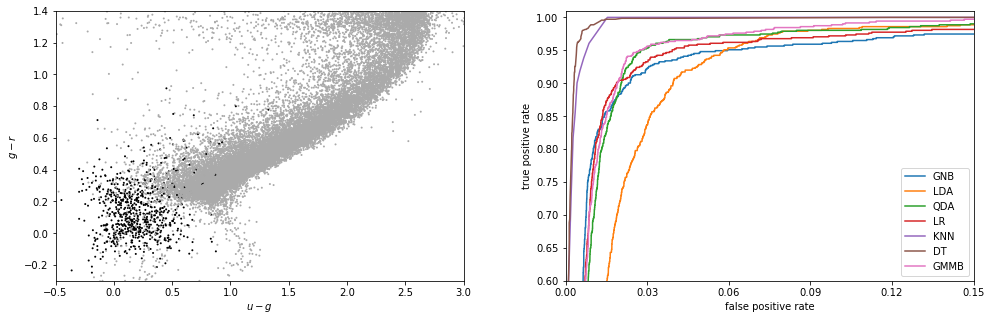

In [212]:
#------------------------------------------------------------
# Compute fits for all the classifiers
def compute_results(*args):
    names = []
    probs = []

    for classifier, kwargs in args:
        print(classifier.__name__)
        model = classifier(**kwargs)
        model.fit(X, y)
        y_prob = model.predict_proba(X_test)

        names.append(classifier.__name__)
        probs.append(y_prob[:, 1])

    return names, probs

LRclass_weight = dict([(i, np.sum(y_train == i)) for i in (0, 1)])

names, probs = compute_results((GaussianNB, {}),
                               (LDA, {}),
                               (QDA, {}),
                               (LogisticRegression,
                                dict(class_weight=LRclass_weight)),
                               (KNeighborsClassifier,
                                dict(n_neighbors=10)),
                               (DecisionTreeClassifier,
                                dict(random_state=0, max_depth=12,
                                     criterion='entropy')),
                               (GMMBayes, dict(n_components=3, min_covar=1E-5,
                                               covariance_type='full')))

#------------------------------------------------------------
# Plot results
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# First axis shows the data
ax1 = fig.add_subplot(121)
im = ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=4,
                 linewidths=0, edgecolors='none',
                 cmap=plt.cm.binary)
im.set_clim(-0.5, 1)
ax1.set_xlim(-0.5, 3.0)
ax1.set_ylim(-0.3, 1.4)
ax1.set_xlabel('$u - g$')
ax1.set_ylabel('$g - r$')

labels = dict(GaussianNB='GNB',
              LinearDiscriminantAnalysis='LDA',
              QuadraticDiscriminantAnalysis='QDA',
              KNeighborsClassifier='KNN',
              DecisionTreeClassifier='DT',
              GMMBayes='GMMB',
              LogisticRegression='LR')

# Second axis shows the ROC curves
ax2 = fig.add_subplot(122)
for name, y_prob in zip(names, probs):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax2.plot(fpr, tpr, label=labels[name])

ax2.legend(loc=4)
ax2.set_xlabel('false positive rate')
ax2.set_ylabel('true positive rate')
ax2.set_xlim(0, 0.15)
ax2.set_ylim(0.6, 1.01)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.savefig('compare_classifiers.png', bbox_inches='tight')
plt.show()

#  KNN classification

The color order in the following plots is u-g,  g-r,  r-i, i-z. Since quasars are well separated from stars even using only u-g color (vertical line), this is a good order. For the RR Lyrae example in the book (Fig. 9.7) the color order is changed from [0,1,2,3] to [1,0,2,3] since RR Lyrae are better separated from stars horizontally (horizontal line). Our program is inspired by code from Fig. 9.7 in the textbook.

In [213]:
N_tot = len(y)
N_st = np.sum(y == 0)
N_qso = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = N_tot

#----------------------------------------------------------------------
# perform Classification

classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)
kvals = [1, 5, 10, 40]

for k in kvals:
    classifiers.append([])
    predictions.append([])
    for nc in Ncolors:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers[-1].append(clf)
        predictions[-1].append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)


completeness [[ 0.46910112  0.66994382  0.73595506  0.76404494]
 [ 0.58146067  0.76825843  0.84550562  0.84269663]
 [ 0.51966292  0.74578652  0.83707865  0.83707865]
 [ 0.62359551  0.78792135  0.84269663  0.85955056]]
contamination [[ 0.52489331  0.34024896  0.25462304  0.22285714]
 [ 0.40602582  0.22957746  0.18428184  0.16550765]
 [ 0.3843594   0.21099554  0.16174402  0.13997114]
 [ 0.35745297  0.21538462  0.16666667  0.14763231]]


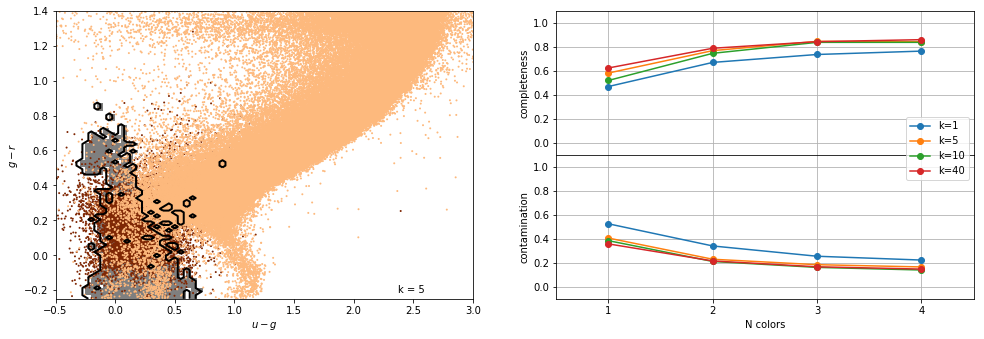

In [215]:
#------------------------------------------------------------
# Compute the decision boundary
# choose k index  , 
# which selects a k value from 
# kvals[kindex]
kindex = 1
clf = classifiers[kindex][1]
xlim = (-0.5,3)
ylim = (-0.25,1.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 0], X[-N_plot:, 1], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.Oranges, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 2)


ax.contour(xx, yy, Z, [0.5],linewidths=2., colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.text(0.82, 0.02, "k = %i" % kvals[kindex],
        transform=ax.transAxes)

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
for i in range(len(kvals)):
    ax.plot(Ncolors, completeness[i], 'o-',ms=6, label='k=%i' % kvals[i])


ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
for i in range(len(kvals)):
    ax.plot(Ncolors, contamination[i], 'o-',  ms=6, label='k=%i' % kvals[i])
ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.79))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)
plt.savefig('knn_comp2.png', bbox_inches='tight')
plt.show()

## Plotting the ROC curve for different k values up to 2 colors:

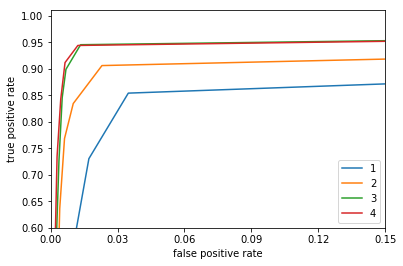

In [216]:
fig,ax = plt.subplots(1,1)
ax2 = ax
k = 5 
for nc  in Ncolors: 
    model = KNeighborsClassifier(n_neighbors=k)     
    model.fit(X_train[:, :nc], y_train)
    y_prob = model.predict_proba(X_test[:, :nc])
    y_prob = y_prob[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])
    ax2.plot(fpr, tpr, label=str(nc))

ax2.legend(loc=4)
ax2.set_xlabel('false positive rate')
ax2.set_ylabel('true positive rate')
ax2.set_xlim(0, 0.15)
ax2.set_ylim(0.6, 1.01)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.savefig('knn_ROC.png', bbox_inches='tight')
plt.show()

# Gaussian Naive Bayes Classification

completeness [ 0.          0.7261236   0.73735955  0.12359551]
contamination [ 0.          0.25396825  0.28082192  0.41721854]


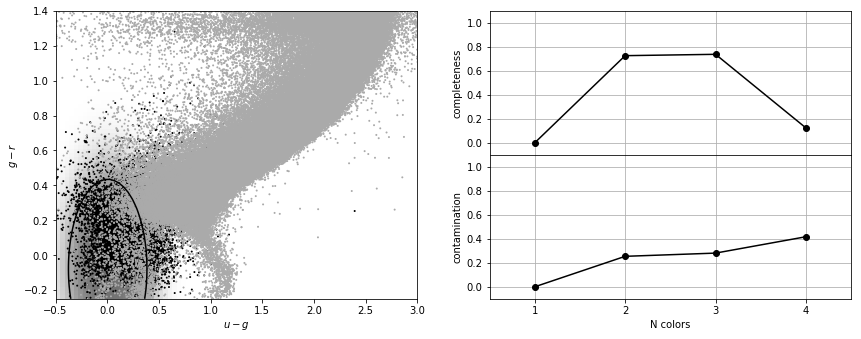

In [217]:
#----------------------------------------------------------------------
# perform Naive Bayes
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = GaussianNB()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (-0.5, 3.)
ylim = (-0.25,1.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 81),
                     np.linspace(ylim[0], ylim[1], 71))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(13, 5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax =fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 0], X[-N_plot:, 1], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)
ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# Plot completeness vs Ncolors
ax = plt.subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# Plot contamination vs Ncolors
ax = plt.subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)
plt.savefig('NaiveBayes_comp2.png', bbox_inches='tight')
plt.show()


## Plotting the ROC curve:

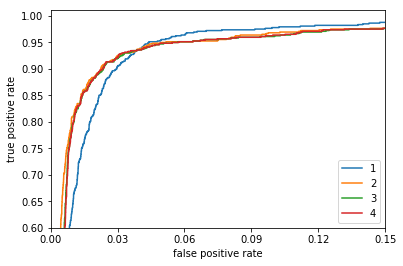

In [218]:
fig,ax = plt.subplots(1,1)
ax2 = ax
for nc  in Ncolors: 
    model = GaussianNB()
    model.fit(X_train[:, :nc], y_train)
    y_prob = model.predict_proba(X_test[:, :nc])
    y_prob = y_prob[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])
    ax2.plot(fpr, tpr, label=str(nc))

ax2.legend(loc=4)
ax2.set_xlabel('false positive rate')
ax2.set_ylabel('true positive rate')
ax2.set_xlim(0, 0.15)
ax2.set_ylim(0.6, 1.01)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.savefig('NaiveBayes_ROC.png', bbox_inches='tight')
plt.show()

# Decision Tree Classification

completeness [[ 0.64466292  0.8497191   0.88202247  0.88202247]
 [ 0.59269663  0.76825843  0.86376404  0.85674157]
 [ 0.5997191   0.76685393  0.84410112  0.86516854]
 [ 0.63342697  0.76966292  0.82724719  0.83146067]]
contamination [[ 0.36161335  0.30138568  0.27733026  0.27566321]
 [ 0.3437014   0.22630835  0.23412204  0.23462986]
 [ 0.35885886  0.23529412  0.19328859  0.19477124]
 [ 0.37793103  0.26737968  0.20189702  0.19455782]]


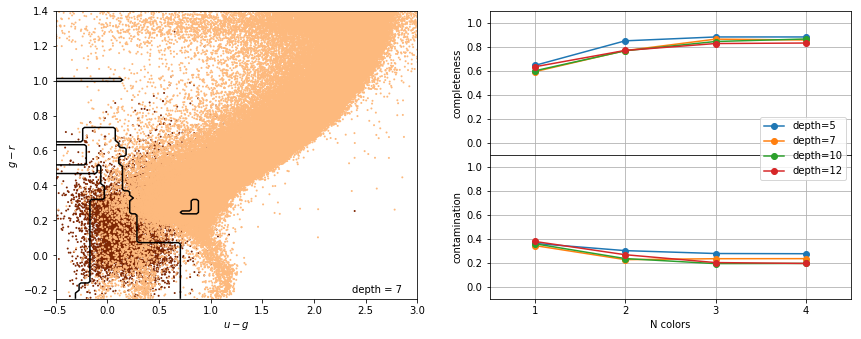

In [223]:
#----------------------------------------------------------------------
# Fit Decision tree
Ncolors = np.arange(1, X.shape[1] + 1)

classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)
depths = [5,7, 10,12]

for depth in depths:
    classifiers.append([])
    predictions.append([])
    for nc in Ncolors:
        clf = DecisionTreeClassifier(random_state=0, max_depth=depth,
                                     criterion='entropy')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers[-1].append(clf)
        predictions[-1].append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# compute the decision boundary

clf = classifiers[1][1]
xlim = (-0.5, 3.)
ylim = (-0.25,1.4)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 101),
                     np.linspace(ylim[0], ylim[1], 101))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results(figsize=(13, 5))
fig = plt.figure(figsize=(13,5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 0], X[-N_plot:, 1], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.Oranges, zorder=2)
im.set_clim(-0.5, 1)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.text(0.82, 0.02, "depth = %i" % depths[1],
        transform=ax.transAxes)

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
for i in range(len(kvals)):
    ax.plot(Ncolors, completeness[i], 'o-',ms=6, label='depth=%i' % depths[i])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
for i in range(len(kvals)):
    ax.plot(Ncolors, contamination[i], 'o-',ms=6, label='depth=%i' % depths[i])
    
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.79))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)
plt.savefig('DecisionTree_comp2.png', bbox_inches='tight')
plt.show()

## Plotting ROC as a function of colors  (setting depth to be fixed at 5):

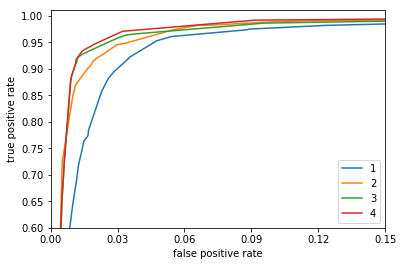

In [224]:
fig,ax = plt.subplots(1,1)
ax2 = ax

depth = 5 
for nc  in Ncolors: 
    model = DecisionTreeClassifier(random_state=0, max_depth=depth,
                                     criterion='entropy')
    model.fit(X_train[:, :nc], y_train)
    y_prob = model.predict_proba(X_test[:, :nc])
    y_prob = y_prob[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])
    ax2.plot(fpr, tpr, label=str(nc))

ax2.legend(loc=4)
ax2.set_xlabel('false positive rate')
ax2.set_ylabel('true positive rate')
ax2.set_xlim(0, 0.15)
ax2.set_ylim(0.6, 1.01)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.savefig('DecisionTree_ROC.png', bbox_inches='tight')
plt.show()

**Comment about which catalogs were used**:

We start with known SDSS stars and quasars, that make up the set X, with known labels y.

We split that into X_test, X_train,  and y_test,  y_train.  In the process, we predict the labels y_pred for the X_test sample. The ROC curve uses the predicted labels y_pred against the true labels in the test set y_test. 

Thus the whole HLC-NSC catalog with unknown labels y could not be used to make ROC. However, we could use it as test to classify the unknown objects (of course then there is no truth, so we could not evaluate completeness, contamination, ROC, etc.) .

Perhaps the best approach is to use the known QSO and stars to make X,y and split it into X_train, X_test, y_train, y_test. Using that come up with the best set of parameters for a given classifier, including the performance tests (completeness, contammination, ROC , etc. )

Then given that knowledge, we can use these settings (eg. N for KNN), with quantitative completeness / ROC / contamination statements, to make classifications on a mystery set : the full HLC-NSC catalog, where the true labels are to be determined. However, results on this could be published on a perspective paper...

# Addendum

From (Bovy et al. 2011), we see a good illustration of how QSO really move out of the u-g<0.5 locus beyond z=2:  http://iopscience.iop.org/article/10.1088/0004-637X/729/2/141/pdf
<img src='bovy2011_fig7.png' width=900>

From (Fan et al.1999), it shows the redshift color evolution of quasars: http://iopscience.iop.org/article/10.1086/300848/pdf
<img src='fan1999_fig12.png'>

Suberlak+2017: Hessian with SDSS S82 sources from the LSST re-processed S82 data
<img src='suberlak2017_fig11.png' width=500> Colors in the upper-right panel indicate the selection by region in color-color space, as in Ivezic+2004 http://faculty.washington.edu/ivezic/Publications/astroph_0310566.pdf. Objects in the red region are mostly quasars,  those in the blue are hot stars (white dwarfs),  in black - main sequence stars, and in green - the transitional region. It shows that indeed quasars occupy the same color-color space as in Fig.9.18 from AstroML <img src='fig9-18_astroml.png' width=600>  

Here "stars are indicated by gray points, while quasars are indicated by black points." (http://www.astroml.org/book_figures/chapter9/fig_star_quasar_ROC.html)